<a href="https://colab.research.google.com/github/MinalKharbade/Global_Terrorism-analysis/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>



##Importing Libraries <n/>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = ('/content/drive/MyDrive/')

In [ ]:
#Loading the Global Terrorism Dataset
data = pd.read_csv(path + 'Global Terrorism Data.csv', encoding = 'latin-1')
data.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

NOTE:- Since it  contains 135 columns. It has ahuge dataset and many of them does not make any sense in analysis. So,we will rename for better understanding and we will extract only necessary columns from dataset.


In [ ]:
data.rename(columns={'iyear':'Year','imonth':'month','iday':'Day','country_text':'country','provstate':'state','region_txt':'region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'weapon_type','motive':'Motive'},inplace=True)

In [ ]:
data=data[['Year','month','Day','country','state','region','city','latitude','longitude','AttackType','Target','Killed','wounded','Summary','Group','Target_type','weapon_type','Motive']]

In [ ]:
 #Extract new data
data.head()

,Year,month,Day,country,state,region,region,city,latitude,longitude,AttackType,Target,Killed,wounded,Summary,Group,Target_type,weapon_type,Motive
0,1970,7,2,58,NaN,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,130,Federal,1,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,160,Tarlac,5,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,78,Attica,8,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,101,Fukouka,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


##Exploratory Data Analysis


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe0a785e310>,
      dtype=object)

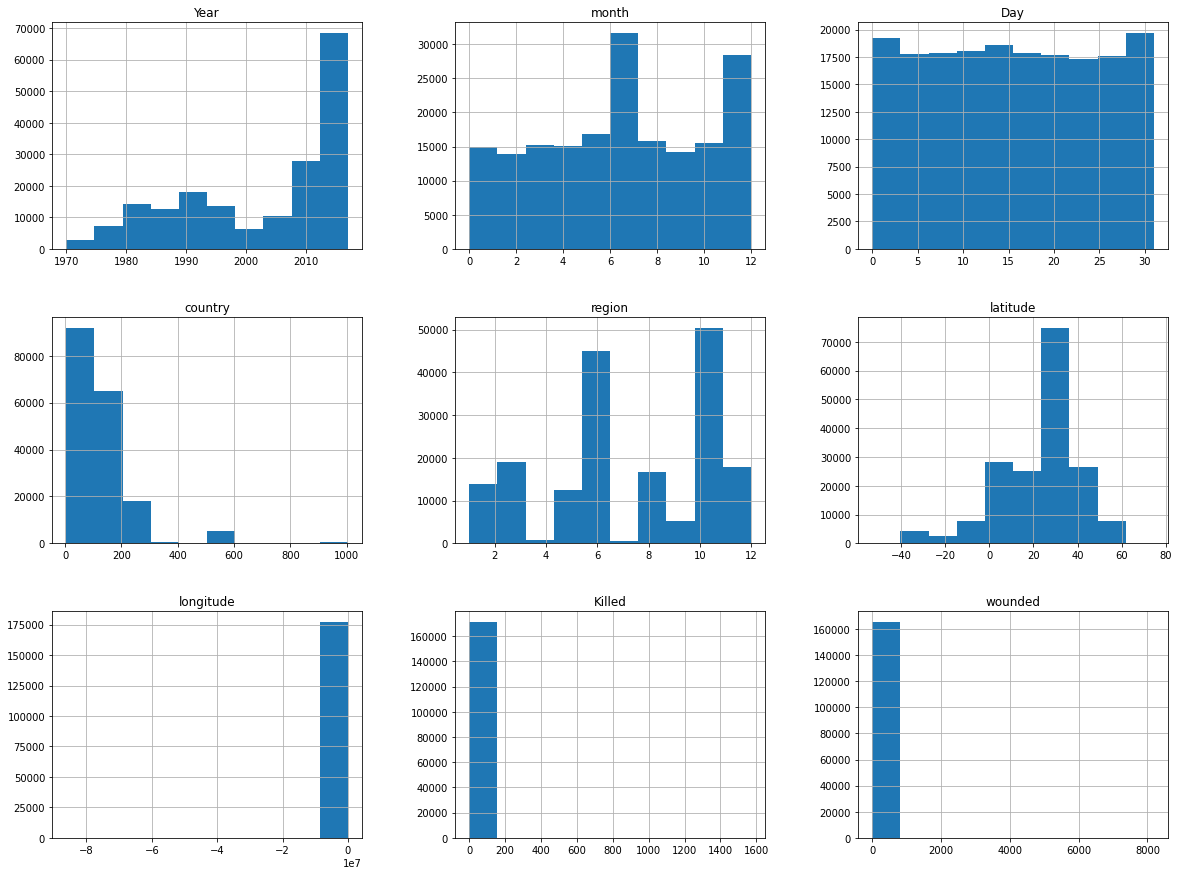

In [ ]:
 # This represents the distribution of data on each series in the DataFrame
 data.hist(figsize=(20,15))

In [ ]:
data.describe()

,Year,month,Day,country,region,latitude,longitude,Killed,wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,131.968501,7.160938,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,112.414535,2.933408,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,78.000000,5.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,98.000000,6.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,160.000000,10.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1004.000000,12.000000,74.633553,1.793667e+02,1570.000000,8191.000000


##Correlation Analysis

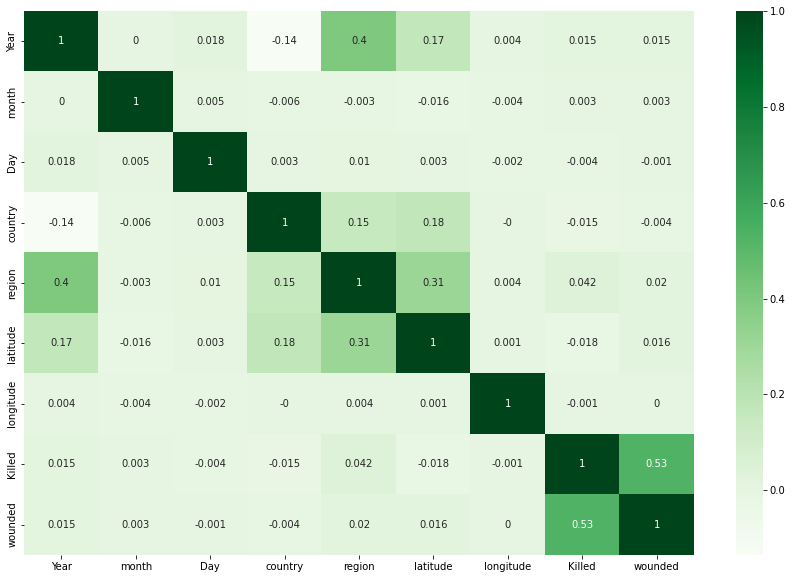

In [ ]:
# This represents one parameter is how much related to other dataset
plt.figure(figsize=(15,10))
sns.heatmap(np.round(data.corr(),3),annot=True , cmap='Greens')

##Number of Terrorist Activities in each Year

In [ ]:
prod=pd.DataFrame(data)
prod


,Year,month,Day,country,state,region,region,city,latitude,longitude,AttackType,Target,Killed,wounded,Summary,Group,Target_type,weapon_type,Motive
0,1970,7,2,58,NaN,2,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,Julio Guzman,1.0,0.0,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,130,Federal,1,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,160,Tarlac,5,Southeast Asia,Unknown,15.478598,120.599741,Assassination,Employee,1.0,0.0,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,78,Attica,8,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,NaN,NaN,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,101,Fukouka,4,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,NaN,Unknown,Government (Diplomatic),Incendiary,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,182,Middle Shebelle,11,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,Checkpoint,1.0,2.0,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN
181687,2017,12,31,200,Lattakia,10,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,Hmeymim Air Base,2.0,7.0,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN
181688,2017,12,31,160,Maguindanao,5,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,Houses,0.0,0.0,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN
181689,2017,12,31,92,Manipur,6,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,Office,0.0,0.0,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


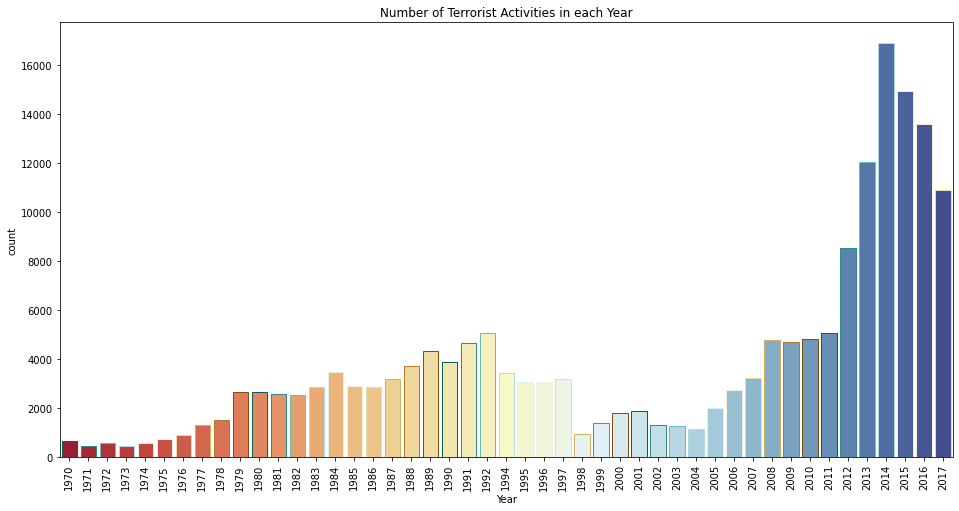

In [ ]:
plt.subplots(figsize=(16,8))
sns.countplot('Year',data=data,palette= 'RdYlBu',edgecolor=sns.color_palette( 'BrBG_r',10))
plt.xticks(rotation=90)
plt.title("Number of Terrorist Activities in each Year")
plt.show()

Since 2012 there has large number of Terrorist activities.

##Number of Attacks were there in 1970 and 2017

In [ ]:
Year = data.Year.value_counts().to_dict()
print(Year[1970],"Attacks happend in 1970 &",Year[2017],"Attacks happend in 2017")

651 Attacks happend in 1970 & 10900 Attacks happend in 2017


##Percentage that have increased from 1970 to 2017

In [ ]:
rate=((Year[2017]-Year[1970])/Year[2017])*100
print('So the number of attacks from 1970 has increased by',np.round(rate,0),' % till 2017')

So the number of attacks from 1970 has increased by 94.0  % till 2017


##Total number of casualities to the total number of Killed people in each country in each year


In [ ]:
px.scatter(data,data.wounded,data.Killed,hover_name='country',animation_frame='Year',animation_group='country',color='AttackType',
           range_color=[0,1],labels={'Killed':'Deaths','wounded':'Casualities'},
           title='Number of Casualities vs Killed people in each country for each year')

##Methods of Attack

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



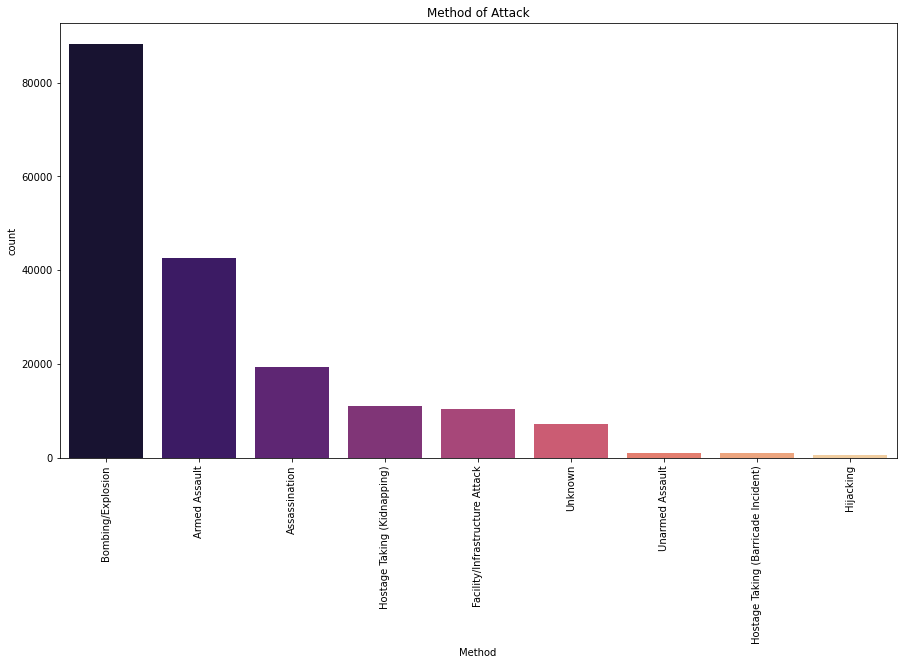

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data['AttackType'],order=data['AttackType'].value_counts().index,
              palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Method')
plt.title('Method of Attack')
plt.show()

Since above chart is clearly showing Bombing/Explosion method are mostly used.

##Type of Target

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



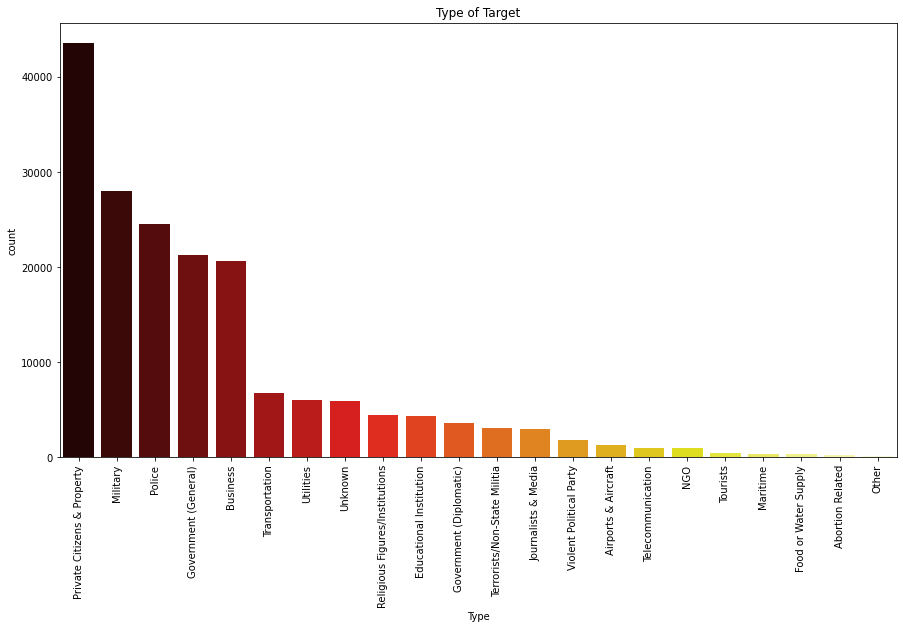

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data['Target_type'],order=data['Target_type'].value_counts().index,
              palette='hot')
plt.xticks(rotation=90)
plt.xlabel('Type')
plt.title('Type of Target')
plt.show()

This graph shows that Private citizens & property are mostly targeted.

##Country suffered the maximum attacks(state of number) and country suffered minimum attacks(state of number)



In [ ]:
terr=data.groupby(['country'],as_index=False).count()

In [ ]:
max_count=terr['Year'].max()
max_id=terr['Year'].idxmax()
max_name=terr['country'][max_id]
min_count=terr['Year'].min()
min_id=terr['Year'].idxmin()
min_name=terr['country'][min_id]


In [ ]:
print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

95 has suffered the maximum number of terror attacks of 24636
7 has suffered the minimum number of terror attacks of 1


##Now lets check out which terrorist organizations have carried out their operations in each country.

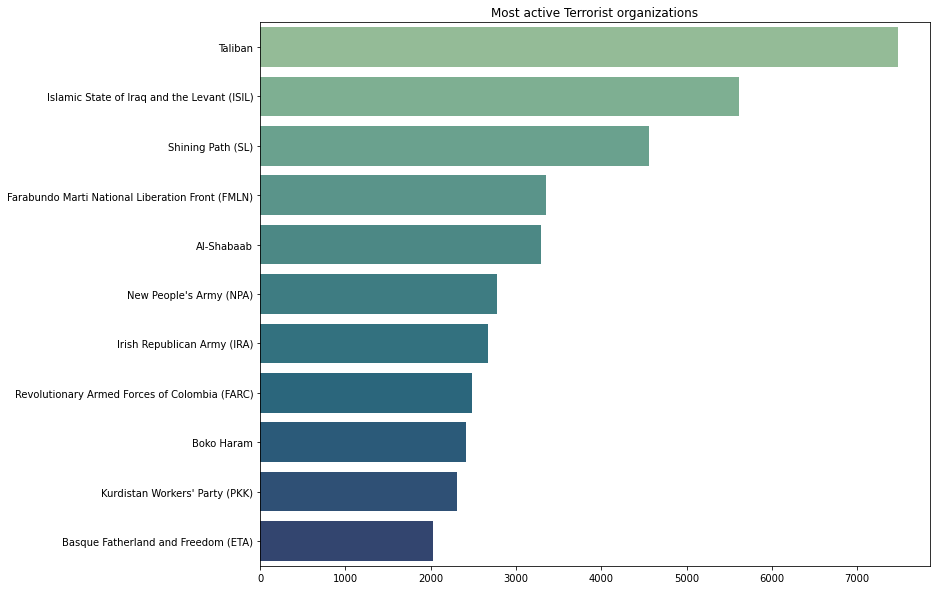

In [ ]:
plt.subplots(figsize=(12,10))
sns.barplot(y=data['Group'].value_counts()[1:12].index,x=data['Group'].value_counts()[1:12].values,
            palette='crest')
plt.title('Most active Terrorist organizations')
plt.show()

By this graph we can say that Taliban is the most active terror organization.

## Insights derived from the above EDA

1. Since 2012 there has large number of terrorist activities.
2. The number of attacks from 1970 has increased by 94.0  % till 2017.
3. Mostly bombing/explosion are used for attacks.
4. Most targeted area are private citizens and property.
5. Taliban is the most active terror organization.